In [1]:
import numpy as np
import pandas as pd

distinct_features = ["By Owner",
                     "Exclusive",
                     "Sublet / Lease-Break",
                     "No Fee",
                     "Reduced Fee",
                     "Short Term Allowed",
                     "Furnished",
                     "Laundry In Unit",
                     "Private Outdoor Space",
                     "Parking Space",
                     "Cats Allowed",
                     "Dogs Allowed",
                     "Doorman",
                     "Elevator",
                     "Fitness Center",
                     "Laundry In Building",
                     "Common Outdoor Space",
                     "Storage Facility"]

def load_data(filename):
    with open(filename) as f:
        data = pd.read_json(f)

    dist = data.features.apply(
        lambda x: pd.Series(map(lambda z: 1 if (z in x) else 0, distinct_features) +
                            [list(np.setdiff1d(x, distinct_features))]))
    dist.columns = distinct_features + ["UNIQUES"]

    data = data.join(dist)

    man_counts = pd.DataFrame(data.manager_id.value_counts())
    man_counts["manager count"] = man_counts["manager_id"]
    man_counts["manager_id"] = man_counts.index

    data = pd.merge(data, man_counts, on="manager_id")

    return data


train_data = pd.read_json("~/two-sigma/data/processed_train.json")

In [4]:
train_data.columns

Index([u'By Owner', u'Cats Allowed', u'Common Outdoor Space', u'Dogs Allowed',
       u'Doorman', u'Elevator', u'Exclusive', u'Fitness Center', u'Furnished',
       u'Laundry In Building', u'Laundry In Unit', u'No Fee', u'Parking Space',
       u'Private Outdoor Space', u'Reduced Fee', u'Short Term Allowed',
       u'Storage Facility', u'Sublet / Lease-Break', u'avg_brightness',
       u'avg_imagesize', u'avg_luminance', u'bathrooms', u'bedrooms',
       u'building_id', u'created', u'description', u'description_sentiment',
       u'display_address', u'dist_count', u'features', u'img_quantity',
       u'interest_level', u'latitude', u'listing_id', u'longitude',
       u'manager count', u'manager_id', u'photos', u'price', u'street_address',
       u'unique_count', u'word_count'],
      dtype='object')

In [271]:
Low = train_data[train_data['interest_level']=='low'] 
Medium = train_data[train_data['interest_level']=='medium']
High = train_data[train_data['interest_level']=='high']

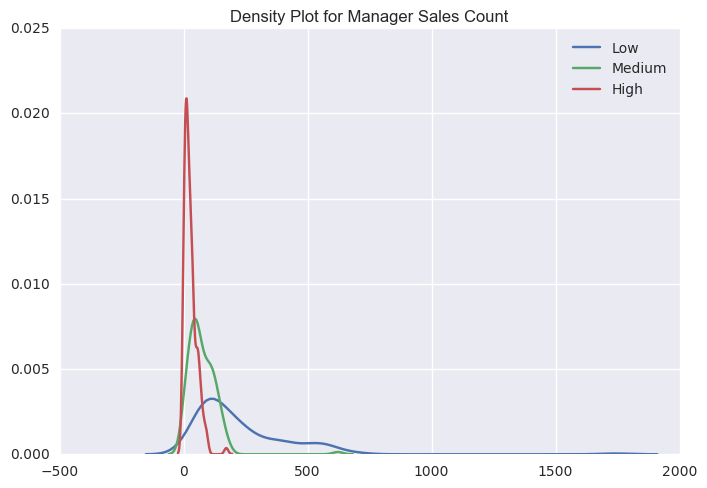

In [276]:
sns.distplot(Low.groupby(Low['manager count']).size(), hist=False, rug=False,label="Low")
sns.distplot(Medium.groupby(Medium['manager count']).size(), hist=False, rug=False,label="Medium")
sns.distplot(High.groupby(High['manager count']).size(), hist=False, rug=False,label="High")
plt.title('Density Plot for Manager Sales Count')
plt.show()

In [311]:
train_data.head()

,By Owner,Cats Allowed,Common Outdoor Space,Dogs Allowed,Doorman,Elevator,Exclusive,Fitness Center,Furnished,Laundry In Building,...,longitude,manager count,manager_id,photos,price,street_address,unique_count,word_count,LogScaledPrice,Rooms
0,0,0,0,0,0,0,0,0,0,0,...,-73.9425,90,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,0,130,8.006368,4.5
1,0,0,0,0,0,0,0,0,0,0,...,-73.9423,90,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/6890059_a3109b80...,2250,585 Meeker Avenue,1,96,7.718685,2.0
10,0,0,0,0,0,0,0,0,0,0,...,-73.9209,90,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/6867765_5957b486...,2000,71 Wyckoff Avenue,0,52,7.600902,2.0
100,0,1,0,1,0,0,0,0,0,0,...,-73.9939,86,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7147902_91335b2e...,5307,420 W 42nd St,0,0,8.576782,4.0
1000,0,0,0,0,0,0,0,0,0,0,...,-73.9809,2533,e6472c7237327dd3903b3d6f6a94515a,[https://photos.renthop.com/2/6873818_bfbd1041...,2200,250 West 78th Street,2,124,7.696213,2.0


In [316]:
train_data[train_data['manager count']==2533].sort(columns="created", ascending=False).created

/Users/tommyhuang/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


1459    2016-06-29 17:03:29
2681    2016-06-29 11:56:18
1517    2016-06-29 11:36:42
1697    2016-06-29 06:37:05
1893    2016-06-29 06:36:56
1854    2016-06-29 06:34:56
1765    2016-06-29 06:34:02
1918    2016-06-29 06:25:57
1876    2016-06-29 06:25:52
857     2016-06-29 06:18:45
1858    2016-06-29 06:14:56
1818    2016-06-29 06:14:34
1791    2016-06-29 06:13:13
3177    2016-06-29 06:13:02
1822    2016-06-29 06:11:32
1474    2016-06-29 06:10:33
1456    2016-06-29 06:09:00
1424    2016-06-29 05:48:36
1629    2016-06-29 05:43:16
1465    2016-06-29 05:24:26
1606    2016-06-29 05:20:43
1394    2016-06-29 04:58:25
2797    2016-06-29 04:57:50
1932    2016-06-29 04:27:01
1900    2016-06-29 04:03:56
1812    2016-06-29 04:03:54
1786    2016-06-29 03:42:50
1613    2016-06-29 03:15:00
1744    2016-06-29 03:11:17
1667    2016-06-29 03:10:27
               ...         
1273    2016-04-02 09:17:21
3065    2016-04-02 08:20:05
1368    2016-04-02 06:09:51
858     2016-04-02 06:07:45
3253    2016-04-02 0

In [320]:
train_data.created.sort_values()


15688    2016-04-01 22:12:41
29520    2016-04-01 22:56:00
29518    2016-04-01 22:57:15
43296    2016-04-01 23:26:07
5799     2016-04-02 00:48:13
42800    2016-04-02 01:11:13
43929    2016-04-02 01:11:30
12231    2016-04-02 01:11:31
32857    2016-04-02 01:11:34
40953    2016-04-02 01:11:40
1007     2016-04-02 01:12:21
21107    2016-04-02 01:12:42
9629     2016-04-02 01:13:09
19754    2016-04-02 01:13:38
34416    2016-04-02 01:13:48
32564    2016-04-02 01:13:56
21102    2016-04-02 01:13:59
1335     2016-04-02 01:14:46
42350    2016-04-02 01:14:55
1104     2016-04-02 01:15:58
30901    2016-04-02 01:16:08
28451    2016-04-02 01:16:45
42235    2016-04-02 01:16:45
28450    2016-04-02 01:16:56
43055    2016-04-02 01:16:57
35102    2016-04-02 01:17:28
36262    2016-04-02 01:17:35
47394    2016-04-02 01:18:03
3542     2016-04-02 01:18:04
20770    2016-04-02 01:18:25
                ...         
27255    2016-06-29 17:14:07
6892     2016-06-29 17:15:08
7006     2016-06-29 17:16:12
7039     2016-

In [313]:
train_data.columns

Index([             u'By Owner',          u'Cats Allowed',
        u'Common Outdoor Space',          u'Dogs Allowed',
                     u'Doorman',              u'Elevator',
                   u'Exclusive',        u'Fitness Center',
                   u'Furnished',   u'Laundry In Building',
             u'Laundry In Unit',                u'No Fee',
               u'Parking Space', u'Private Outdoor Space',
                 u'Reduced Fee',    u'Short Term Allowed',
            u'Storage Facility',  u'Sublet / Lease-Break',
              u'avg_brightness',         u'avg_imagesize',
               u'avg_luminance',             u'bathrooms',
                    u'bedrooms',           u'building_id',
                     u'created',           u'description',
       u'description_sentiment',       u'display_address',
                  u'dist_count',              u'features',
                u'img_quantity',        u'interest_level',
                    u'latitude',            u'listing_id